In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rubin_sim.maf as maf
import rubin_sim.movingObjects as mo

In [2]:
occ1_file = 'occ-vokrouhlicky19-case1_ver10-rmax5-5k.txt'
occ1 = mo.Orbits()
occ1.readOrbits(occ1_file)
occ1.orbits['sed_filename'] = 'D.dat'

occ2_file = 'occ-vokrouhlicky19-case1_ver10-rmax20-5k.txt'
occ2 = mo.Orbits()
occ2.readOrbits(occ2_file)
occ2.orbits['sed_filename'] = 'D.dat'

In [3]:
occ1.orbits

,objId,q,e,inc,Omega,argPeri,tPeri,H,epoch,g,sed_filename
0,0,4.834513,0.869206,110.167527,268.194151,319.205580,61603.039209,15,61603.987528,0.15,D.dat
1,1,1.637849,0.961966,128.452173,49.131130,27.844854,60614.925965,15,60614.927159,0.15,D.dat
2,2,0.577640,1.001316,160.385488,153.556524,86.638250,61280.031030,15,61280.030911,0.15,D.dat
3,3,2.591036,0.957539,116.813702,99.967083,296.987579,63780.727878,15,63782.738956,0.15,D.dat
4,4,4.782566,0.936283,172.748343,264.405302,248.138974,60491.193214,15,60493.940714,0.15,D.dat
...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,3.205936,0.937362,161.416173,57.866093,5.662680,61936.900014,15,61936.903713,0.15,D.dat
4996,4996,3.069091,0.913379,126.528595,149.120864,88.395722,59842.268403,15,59842.268619,0.15,D.dat
4997,4997,1.987447,0.961878,100.825348,60.411116,126.481573,63020.041035,15,63021.630927,0.15,D.dat
4998,4998,2.673113,0.926510,165.072908,49.910470,19.846182,59971.290645,15,59971.295618,0.15,D.dat


In [4]:
occ2.orbits

,objId,q,e,inc,Omega,argPeri,tPeri,H,epoch,g,sed_filename
0,0,19.571768,0.471160,140.010167,31.092271,38.260649,59866.759101,15,59866.774984,0.15,D.dat
1,1,11.123344,0.679065,64.496735,146.483488,132.696522,62336.738716,15,62337.572070,0.15,D.dat
2,2,16.560928,0.575109,130.250893,8.846280,108.087976,63974.513130,15,63975.520767,0.15,D.dat
3,3,14.367223,0.587528,61.119701,113.022046,115.911455,64197.076529,15,64197.925599,0.15,D.dat
4,4,11.487984,0.690998,92.524339,93.808812,19.252646,60661.555377,15,60662.483144,0.15,D.dat
...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,16.633913,0.671693,63.586135,281.594012,342.396789,61957.249267,15,61958.756118,0.15,D.dat
4996,4996,11.845267,0.691694,141.960449,229.729836,357.140427,60258.615156,15,60258.641373,0.15,D.dat
4997,4997,17.499426,0.501217,122.778808,220.880813,51.411876,61965.106517,15,61965.138183,0.15,D.dat
4998,4998,13.451406,0.753438,112.259220,14.394156,337.282035,64152.112967,15,64152.134140,0.15,D.dat


Text(0, 0.5, 'e')

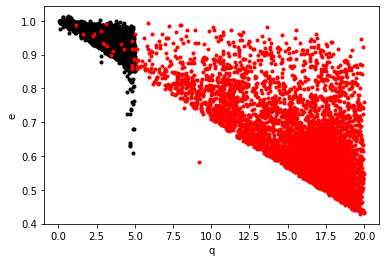

In [5]:
plt.plot(occ1.orbits['q'], occ1.orbits['e'], 'k.')
plt.plot(occ2.orbits['q'], occ2.orbits['e'], 'r.')
plt.xlabel("q")
plt.ylabel("e")

Text(0, 0.5, 'inc')

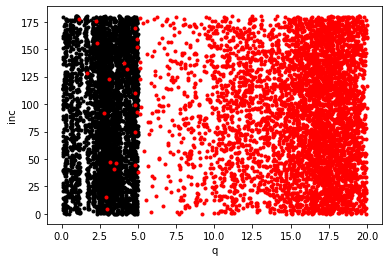

In [6]:
plt.plot(occ1.orbits['q'], occ1.orbits['inc'], 'k.')
plt.plot(occ2.orbits['q'], occ2.orbits['inc'], 'r.')
plt.xlabel("q")
plt.ylabel("inc")

In [7]:
# snapshot
pyephs = mo.PyOrbEphemerides()
pyephs.setOrbits(occ1)
ephs = pyephs.generateEphemerides(times = [occ1.orbits.epoch.iloc[0]])

Text(0, 0.5, 'Dec')

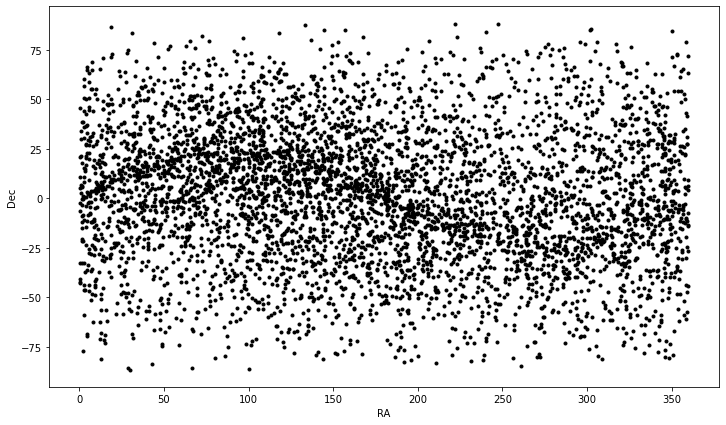

In [8]:
plt.figure(figsize=(12, 7))
plt.plot(ephs['ra'], ephs['dec'], 'k.')
plt.xlabel('RA')
plt.ylabel('Dec')

In [9]:
# snapshot
pyephs = mo.PyOrbEphemerides()
pyephs.setOrbits(occ2)
ephs = pyephs.generateEphemerides(times = [occ2.orbits.epoch.iloc[0]])

Text(0, 0.5, 'Dec')

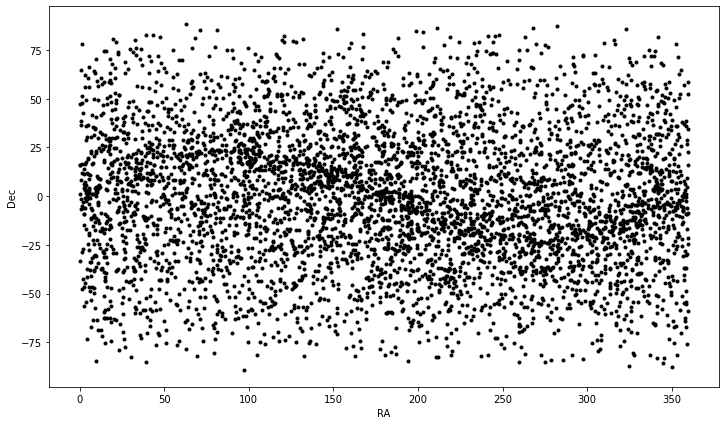

In [10]:
plt.figure(figsize=(12, 7))
plt.plot(ephs['ra'], ephs['dec'], 'k.')
plt.xlabel('RA')
plt.ylabel('Dec')

In [11]:
try:
    os.mkdir('split')
except FileExistsError:
    pass

subsetLen = len(occ1)
subpieces = 500

root = 'occ_rmax5_5k'
occ1.orbits.to_csv('%s.txt' % root, index=False, sep=' ')

x = np.arange(0, subsetLen+1, subpieces)

for i, (xi, xo) in enumerate(zip(x[:-1], x[1:])):
    occ1.orbits[xi:xo].to_csv('split/%s_%d.txt' % (root, i), index=False, sep=' ')
    
subsetLen = len(occ2)
subpieces = 500

root = 'occ_rmax20_5k'
occ2.orbits.to_csv('%s.txt' % root, index=False, sep=' ')

x = np.arange(0, subsetLen+1, subpieces)

for i, (xi, xo) in enumerate(zip(x[:-1], x[1:])):
    occ2.orbits[xi:xo].to_csv('split/%s_%d.txt' % (root, i), index=False, sep=' ')

In [12]:
!ls

OCC-vokrouhlicky19.ipynb
occ-vokrouhlicky19-case1_ver10-rmax20-5k.txt
occ-vokrouhlicky19-case1_ver10-rmax5-5k.txt
occ_rmax20_5k.txt
occ_rmax5_5k.txt
split


In [13]:
!ls split

occ_rmax20_5k_0.txt occ_rmax20_5k_5.txt occ_rmax5_5k_0.txt  occ_rmax5_5k_5.txt
occ_rmax20_5k_1.txt occ_rmax20_5k_6.txt occ_rmax5_5k_1.txt  occ_rmax5_5k_6.txt
occ_rmax20_5k_2.txt occ_rmax20_5k_7.txt occ_rmax5_5k_2.txt  occ_rmax5_5k_7.txt
occ_rmax20_5k_3.txt occ_rmax20_5k_8.txt occ_rmax5_5k_3.txt  occ_rmax5_5k_8.txt
occ_rmax20_5k_4.txt occ_rmax20_5k_9.txt occ_rmax5_5k_4.txt  occ_rmax5_5k_9.txt


In [14]:
print(len(occ1), len(occ2))

5000 5000
